In [1]:
import matplotlib.pyplot as plt

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
N = 256
p = 3

sim = AdvectionSolver(
    ic=lambda idx, x, y, z, t, xp: ic.square(idx, x, y, z, vx=2, vy=1, xp=xp),
    nx=N,
    ny=N,
    p=p,
    interpolation_scheme="transverse",
    cupy=False,
)

In [3]:
sim.run(n=5)

100%|██████████| 5/5 [00:01<00:00,  4.91it/s]


/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.498047
  warnings.warn(
/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.498047
  warnings.warn(


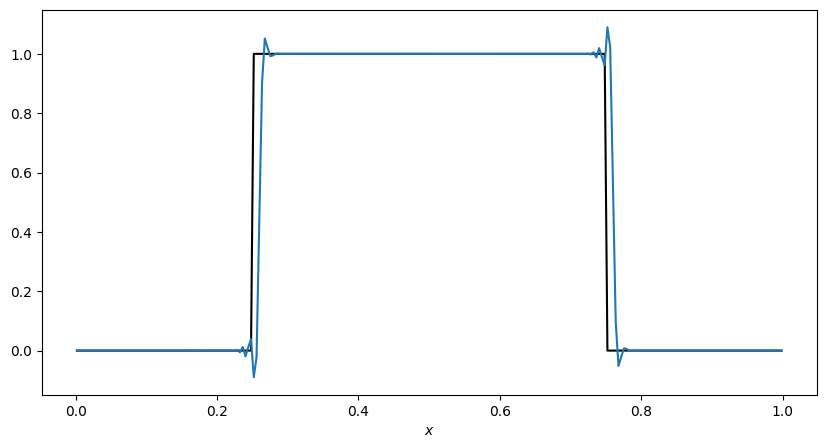

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, y=0.5, t=0, color="k")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, y=0.5, xlabel=True)

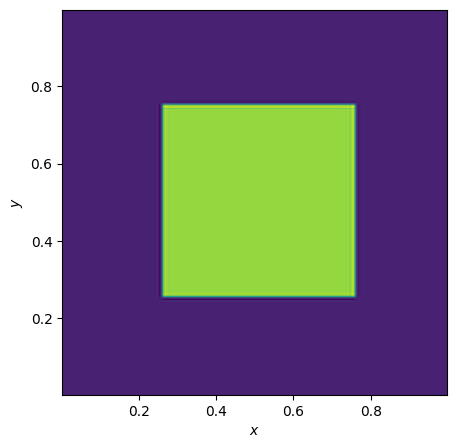

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_2d_slice(sim, ax, "rho", cell_averaged=True)

In [6]:
sim.timer.print_report()

Category                                               Calls      Cumulative Time
-----------------------------------------------------------------------------------
!ExplicitODESolver.integrate.body                          1                 1.04
AdvectionSolver.log_quantity                               7                 0.00
ExplicitODESolver.integrate                                1                 1.09
ExplicitODESolver.take_step                                5                 1.01
FiniteVolumeSolver.f                                      20                 0.98
FiniteVolumeSolver.inplace_apply_bc                      102                 0.01
FiniteVolumeSolver.inplace_compute_fluxes                 20                 0.94
FiniteVolumeSolver.inplace_integrate_fluxes               40                 0.22
FiniteVolumeSolver.inplace_interpolate_faces              40                 0.72
FiniteVolumeSolver.riemann_solver                         40                 0.06
FiniteVolumeSo